In [40]:
import mne
import yasa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import support_functions_sleep as sp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import cohen_kappa_score, confusion_matrix, plot_roc_curve, RocCurveDisplay, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Notas

Para evaluar, realizar un boxplot del conjunto de train, y despues hacer lo mismo en test y deberia entrar dentro de los bigotes del boxplot de train, para ver la variabilidad de los datos y como de representativo son train y test.

In [ ]:
#W=0
#N1=1
#N2=2
#N3=3
#R=4

In [2]:
Xtr, ytr = sp.data_loader(train_path_list =['data_sleep/8/8', 'data_sleep/9/9'], metodo = 'a')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 sec)

50% del dataset
(76, 970)


C:\Users\franc\anaconda3\lib\site-packages\antropy\entropy.py:1011: RuntimeWarning: invalid value encountered in true_divide
  mob = np.sqrt(dx_var / x_var)
C:\Users\franc\anaconda3\lib\site-packages\antropy\entropy.py:1012: RuntimeWarning: invalid value encountered in true_divide
  com = np.sqrt(ddx_var / dx_var) / mob
C:\Users\franc\anaconda3\lib\site-packages\yasa\spectral.py:322: RuntimeWarning: invalid value encountered in true_divide
  bp /= total_power
C:\Users\franc\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1096: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
C:\Users\franc\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\franc\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1096: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
C:\Users

Todo correcto
furula
100% del dataset
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 sec)

50% del dataset
(76, 939)
Todo correcto
100% del dataset


In [3]:
Xts, yts = sp.data_loader(train_path_list =['data_sleep/10/10'], metodo = 'a')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 sec)

50% del dataset
(76, 766)
Todo correcto
furula
100% del dataset


In [4]:
print(Xtr.shape)
print(len(ytr))


(1909, 1235)
1909


In [5]:
#Buscamos las columnas (variables) que tienen Na y las eliminamos al tener muchas variables
nas= np.where(Xtr.isna().any())

nas

(array([1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183,
        1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194,
        1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1218, 1219, 1220,
        1221, 1222, 1223, 1230, 1231, 1232], dtype=int64),)

In [6]:

Xtr = Xtr.drop(Xtr.columns[nas], axis= 'columns')
Xts = Xts.drop(Xts.columns[nas], axis= 'columns')

Comenzamos con la prueba de modelos

In [46]:
#Utilizamos un anova para ver las distribuciones de las variables y como clasifican
import scipy.stats as stats

vars_list = []
for var in Xtr.columns:


    a = Xtr[var][[i == 1 for i in ytr]]
    b = Xtr[var][[i == 2 for i in ytr]]
    c = Xtr[var][[i == 3 for i in ytr]]
    d = Xtr[var][[i == 4 for i in ytr]]
    e = Xtr[var][[i == 0 for i in ytr]]
    # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
    fvalue, pvalue = stats.f_oneway(a, b, c, d, e)

    if pvalue < 0.05:
        vars_list.append(var)
print(len(vars_list))


1178


Primero calculamos la importancia de las variables.

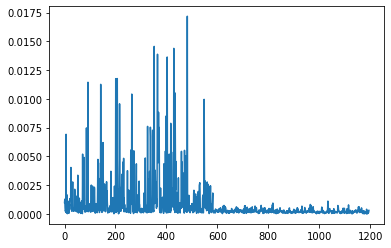

In [8]:
criterion = 'gini'
max_depth = None

#Xtr, Xts, ytr, yts = train_test_split(mediastd, hypno, test_size=0.3, random_state=100)

rf2 = RandomForestClassifier(n_estimators=100, criterion=criterion, random_state=100, max_depth=max_depth)
rf2.fit(Xtr, ytr)
plt.plot(rf2.feature_importances_)



In [18]:
features = rf2.feature_importances_
indice= np.where(features< 0.0005)
idx = list(indice[0])
len(idx)

853

In [22]:
#Como tenemos muchisimas caracteristicas, probamos a eliminar mediante un umbral por importancia

features = rf2.feature_importances_
indice= np.where(features< 0.0005)

idx = list(indice[0])

cols = Xtr.columns[idx]

Xtr_reduced = Xtr.drop(labels = cols, axis=1)
Xts_reduced = Xts.drop(labels = cols, axis=1)

Cohen-kappa 0.6319863342764107
0.706266318537859


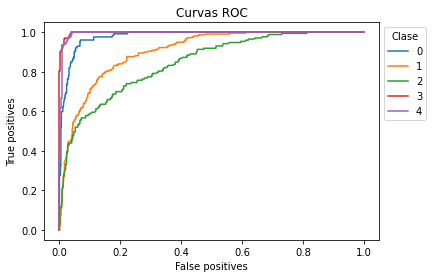

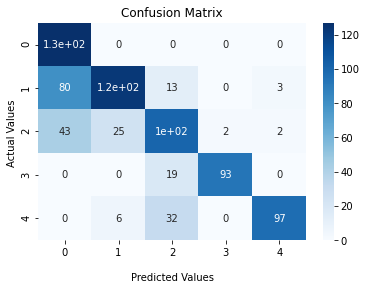

              precision    recall  f1-score   support

           0       1.00      0.51      0.67       250
           1       0.56      0.80      0.66       154
           2       0.58      0.61      0.60       165
           3       0.83      0.98      0.90        95
           4       0.72      0.95      0.82       102

    accuracy                           0.71       766
   macro avg       0.74      0.77      0.73       766
weighted avg       0.76      0.71      0.70       766



In [32]:
## Random forest (ensembles) ##

criterion = 'entropy'
max_depth = None

# Train RF ensemble
rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, criterion=criterion, random_state=100, max_depth=max_depth))
rf.fit(Xtr, ytr)
yb = rf.predict(Xts)

# Evaluate and compare results
print('Cohen-kappa',cohen_kappa_score(yts, yb))
print(rf.score(Xts, yts))
Conf_matrix_RF = confusion_matrix(yts, yb)
Kappa_RF = cohen_kappa_score(yts, yb)


tag_list = np.arange(0,5)
score = rf.predict_proba(Xts)
sp.draw_ROC(yts,score,tag_list)

sp.draw_ConfusionM(Conf_matrix_RF,tag_list)

print(classification_report(yb, yts))

Cohen-kappa 0.6177923017949913
0.695822454308094


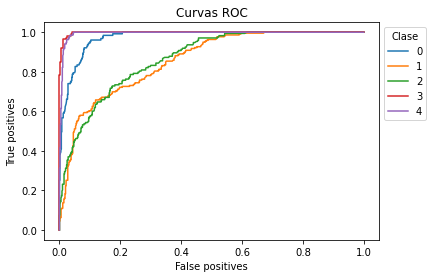

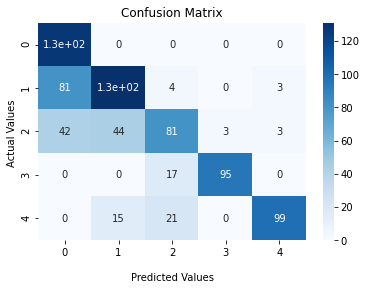

              precision    recall  f1-score   support

           0       1.00      0.51      0.67       250
           1       0.60      0.69      0.64       190
           2       0.47      0.66      0.55       123
           3       0.85      0.97      0.90        98
           4       0.73      0.94      0.83       105

    accuracy                           0.70       766
   macro avg       0.73      0.75      0.72       766
weighted avg       0.76      0.70      0.70       766



In [33]:
## Random forest (ensembles) ## Tamaño reducido de variables

criterion = 'entropy'
max_depth = None

# Train RF ensemble
rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, criterion=criterion, random_state=100, max_depth=max_depth))
rf.fit(Xtr_reduced, ytr)
yb = rf.predict(Xts_reduced)

# Evaluate and compare results
print('Cohen-kappa',cohen_kappa_score(yts, yb))
print(rf.score(Xts_reduced, yts))
Conf_matrix_RF = confusion_matrix(yts, yb)
Kappa_RF = cohen_kappa_score(yts, yb)


tag_list = np.arange(0,5)
score = rf.predict_proba(Xts_reduced)
sp.draw_ROC(yts,score,tag_list)

sp.draw_ConfusionM(Conf_matrix_RF,tag_list)
print(classification_report(yb, yts))

Cohen-kappa 0.5855914189197824
0.6684073107049608


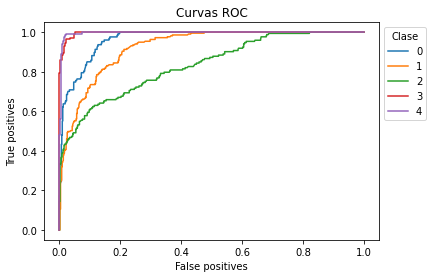

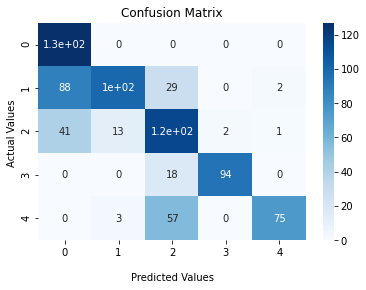

              precision    recall  f1-score   support

           0       1.00      0.50      0.66       256
           1       0.46      0.86      0.60       116
           2       0.67      0.53      0.59       220
           3       0.84      0.98      0.90        96
           4       0.56      0.96      0.70        78

    accuracy                           0.67       766
   macro avg       0.70      0.77      0.69       766
weighted avg       0.76      0.67      0.67       766



In [34]:
## Extratree (ensembles) ##

criterion = 'entropy'
max_depth = None



# Train RF ensemble
rf = OneVsRestClassifier(ExtraTreesClassifier(n_estimators=100, criterion=criterion, random_state=100, max_depth=max_depth))
rf.fit(Xtr, ytr)
yb = rf.predict(Xts)

# Evaluate and compare results
print('Cohen-kappa',cohen_kappa_score(yts, yb))
print(rf.score(Xts, yts))
Conf_matrix_RF = confusion_matrix(yts, yb)
Kappa_RF = cohen_kappa_score(yts, yb)


tag_list = np.arange(0,5)
score = rf.predict_proba(Xts)
sp.draw_ROC(yts,score,tag_list)

sp.draw_ConfusionM(Conf_matrix_RF,tag_list)
print(classification_report(yb, yts))

Cohen-kappa 0.6355066201495803
0.7088772845953003


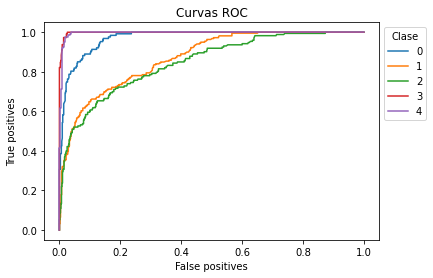

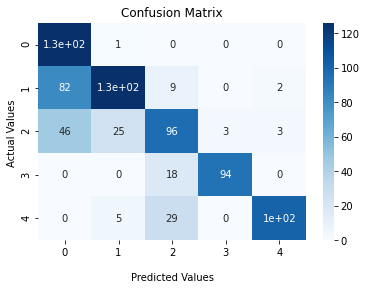

              precision    recall  f1-score   support

           0       0.99      0.50      0.66       254
           1       0.58      0.80      0.67       157
           2       0.55      0.63      0.59       152
           3       0.84      0.97      0.90        97
           4       0.75      0.95      0.84       106

    accuracy                           0.71       766
   macro avg       0.74      0.77      0.73       766
weighted avg       0.77      0.71      0.70       766



In [35]:
## Extratree (ensembles) ## Tamaño reducido de variables

criterion = 'entropy'
max_depth = None



# Train RF ensemble
rf = OneVsRestClassifier(ExtraTreesClassifier(n_estimators=100, criterion=criterion, random_state=100, max_depth=max_depth))
rf.fit(Xtr_reduced, ytr)
yb = rf.predict(Xts_reduced)

# Evaluate and compare results
print('Cohen-kappa',cohen_kappa_score(yts, yb))
print(rf.score(Xts_reduced, yts))
Conf_matrix_RF = confusion_matrix(yts, yb)
Kappa_RF = cohen_kappa_score(yts, yb)


tag_list = np.arange(0,5)
score = rf.predict_proba(Xts_reduced)
sp.draw_ROC(yts,score,tag_list)

sp.draw_ConfusionM(Conf_matrix_RF,tag_list)
print(classification_report(yb, yts))

Observamos que el mayor problema es al clasificar la clase 0 (despierto), ya que predice como N1 y N2 en muchas ocasiones, además de N2 que clasifica como N3 y fase REM (clase 4)

Cohen-kappa 0.5101752157111853
0.6057441253263708


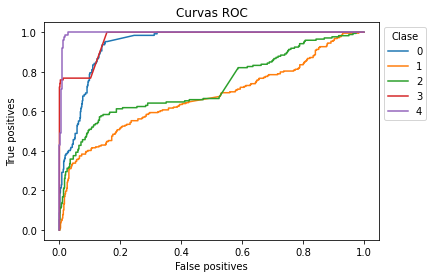

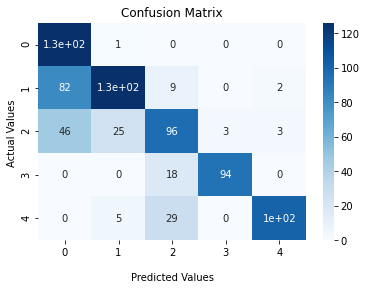

              precision    recall  f1-score   support

           0       1.00      0.37      0.54       341
           1       0.42      0.60      0.49       151
           2       0.35      0.73      0.47        82
           3       0.76      0.98      0.85        87
           4       0.75      0.96      0.84       105

    accuracy                           0.61       766
   macro avg       0.65      0.73      0.64       766
weighted avg       0.75      0.61      0.60       766



In [42]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto',  probability=True))
#svm = OneVsRestClassifier(SVC(gamma = 'auto', probability=True))
svm.fit(Xtr_reduced, ytr)
yb = svm.predict(Xts_reduced)

# Evaluate and compare results
print('Cohen-kappa',cohen_kappa_score(yts, yb))
print(svm.score(Xts_reduced, yts))
Conf_matrix_SVM = confusion_matrix(yts, yb)
Kappa_RF = cohen_kappa_score(yts, yb)


tag_list = np.arange(0,5)
score = svm.predict_proba(Xts_reduced)
sp.draw_ROC(yts,score,tag_list)

sp.draw_ConfusionM(Conf_matrix_RF,tag_list)
print(classification_report(yb, yts))

In [45]:
score

array([[0.88506288, 0.07189503, 0.01769288, 0.01758389, 0.00776531],
       [0.94189497, 0.03983277, 0.0093219 , 0.00588366, 0.0030667 ],
       [0.88820368, 0.07017308, 0.01683267, 0.01715737, 0.0076332 ],
       ...,
       [0.86933333, 0.08066027, 0.01978432, 0.02116382, 0.00905826],
       [0.86933333, 0.08066027, 0.01978432, 0.02116382, 0.00905826],
       [0.86933333, 0.08066027, 0.01978432, 0.02116382, 0.00905826]])

In [ ]:
for model in rf.estimators_:
    
    RocCurveDisplay.from_estimator(model, Xts, yts)